In [9]:

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pickle
# Read the CSV file into a DataFrame

with open("/home/maximilian/Master/carla_garage/_logs/arp/arp_nospeed_data_rep_1/repetition_0/all/arp_arp_nospeed_data_rep_1_wp.pkl", 'rb') as f:
    data_arp = pickle.load(f)
data_arp = pd.DataFrame.from_dict(data_arp, orient='index', columns=['pred', 'gt', 'loss'])
data_arp=data_arp.reset_index()
with open("/home/maximilian/Master/carla_garage/_logs/bcoh/bcoh_nospeed_data_rep_1/repetition_0/all/bcoh_bcoh_nospeed_data_rep_1_wp.pkl", 'rb') as f:
    data_bcoh = pickle.load(f)
data_bcoh = pd.DataFrame.from_dict(data_bcoh, orient='index', columns=['pred', 'gt', 'loss'])
data_bcoh=data_bcoh.reset_index()
with open("/home/maximilian/Master/carla_garage/_logs/bcso/bcso_nospeed_data_rep_1/repetition_0/all/bcso_bcso_nospeed_data_rep_1_wp.pkl", 'rb') as f:
    data_bcso = pickle.load(f)
data_bcso = pd.DataFrame.from_dict(data_bcso, orient='index', columns=['pred', 'gt', 'loss'])
data_bcso=data_bcso.reset_index()

In [10]:
with open("/home/maximilian/Master/carla_garage/_logs/arp/arp_nospeed_data_rep_1/repetition_0/all/arp_arp_nospeed_data_rep_1_vis.pkl", 'rb') as f:
    arp_vis = pickle.load(f)

with open("/home/maximilian/Master/carla_garage/_logs/bcoh/bcoh_nospeed_data_rep_1/repetition_0/all/bcoh_bcoh_nospeed_data_rep_1_vis.pkl", 'rb') as f:
    bcoh_vis = pickle.load(f)

with open("/home/maximilian/Master/carla_garage/_logs/bcso/bcso_nospeed_data_rep_1/repetition_0/all/bcso_bcso_nospeed_data_rep_1_vis.pkl", 'rb') as f:
    bcso_vis = pickle.load(f)


In [11]:
arp_vis

{'/home/maximilian/datasets/one_curve/s10_dataset_2023_05_10/Routes_Town01_Scenario1_Repetition0/Town01_Scenario1_route0_05_10_21_14_24/rgb/0010.jpg': {'pred': array([[[ 9.3177706e-01,  2.2793211e-02],
          [ 2.1084294e+00,  2.0098180e-02],
          [ 3.4114385e+00,  2.0786159e-02],
          [ 4.8109808e+00,  2.1911636e-02],
          [ 6.2895765e+00,  1.5431426e-02],
          [ 7.8325710e+00,  2.2232234e-03],
          [ 9.4272146e+00, -1.1528216e-02],
          [ 1.1061237e+01, -2.0236567e-02]]], dtype=float32),
  'gt': array([[[ 9.6266621e-01,  9.9035416e-05],
          [ 2.1085813e+00,  5.5552799e-05],
          [ 3.3976560e+00,  3.9204635e-04],
          [ 4.8124580e+00,  4.9955904e-04],
          [ 6.3203554e+00,  5.2093412e-04],
          [ 7.8293281e+00, -5.3304426e-05],
          [ 9.3740425e+00,  1.5427443e-04],
          [ 1.1074908e+01, -5.3945690e-04]]], dtype=float32),
  'loss': array(0.0175172, dtype=float32)},
 '/home/maximilian/datasets/one_curve/s10_dataset_20

In [51]:
data_arp=data_arp[data_arp["loss"]<10]
data_bcoh=data_bcoh[data_bcoh["loss"]<10]
data_bcso=data_bcso[data_bcso["loss"]<10]

In [49]:
data_bcso["pred"].iloc[0]

array([[[ 0.6135092 , -0.03476299],
        [ 0.93811154, -0.04467137],
        [ 1.1772515 , -0.04715391],
        [ 1.3896317 , -0.02862653],
        [ 1.6055315 , -0.01081208],
        [ 1.8382789 , -0.0080341 ],
        [ 2.0868897 , -0.02298074],
        [ 2.3399565 , -0.05050933]]], dtype=float32)

(0.0, 2.0)

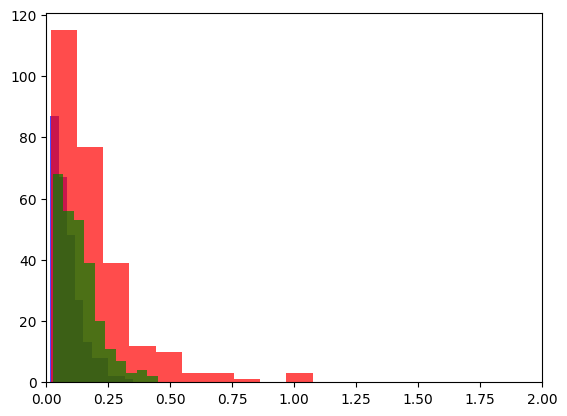

In [3]:
num_bins = int(np.sqrt(len(data_bcso)))
plt.hist(data_arp["loss"], bins=10, alpha=0.7, color="blue")
plt.hist(data_bcoh["loss"],bins=10, alpha=0.7, color="red")
plt.hist(data_bcso["loss"],bins=10, alpha=0.7, color="green")
#plt.xlim(0,4)
plt.xlim(0,2)


__statistical argument__

copycat count for arp
7
copycat count for bcoh
12


/home/maximilian/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


copycat count for bcso
12


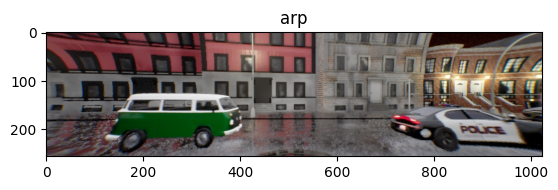

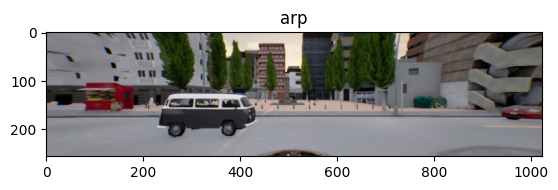

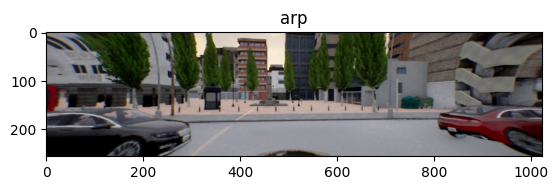

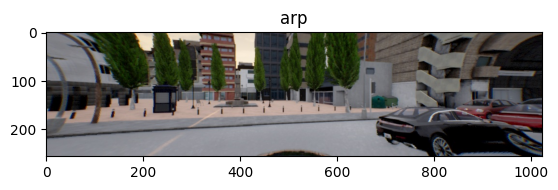

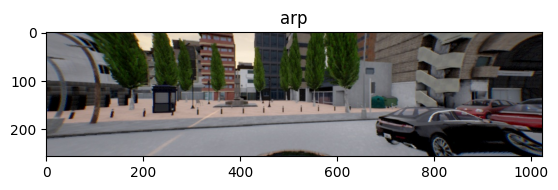

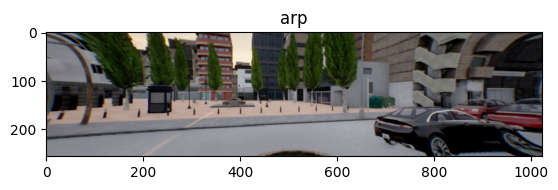

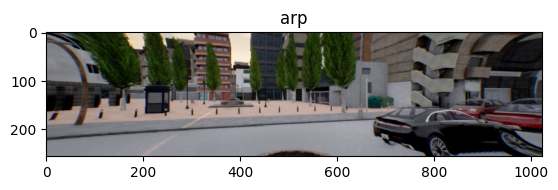

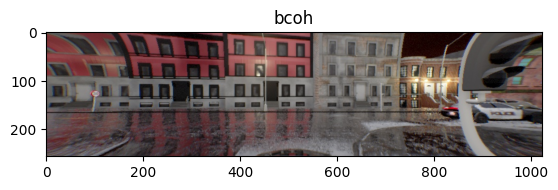

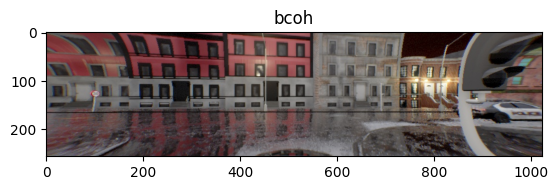

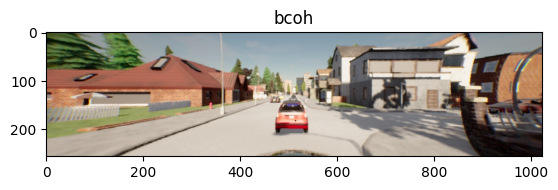

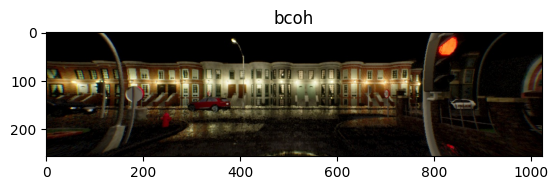

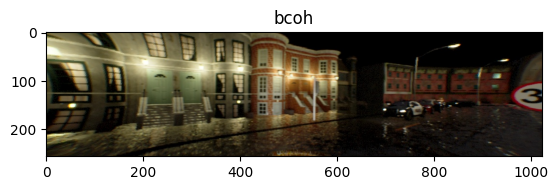

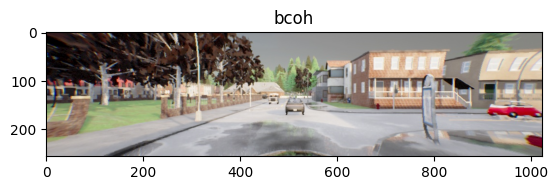

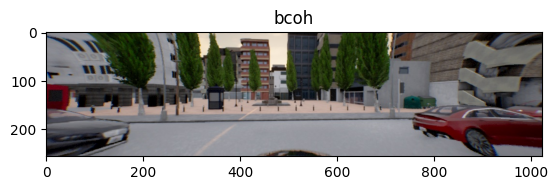

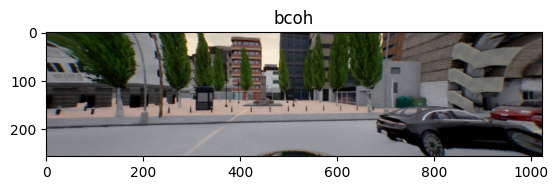

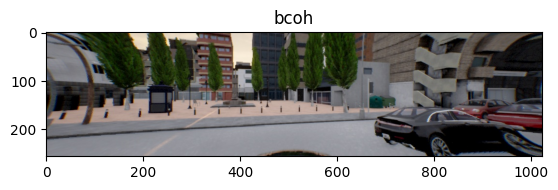

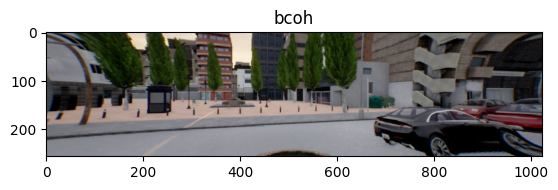

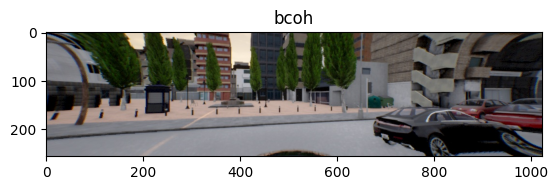

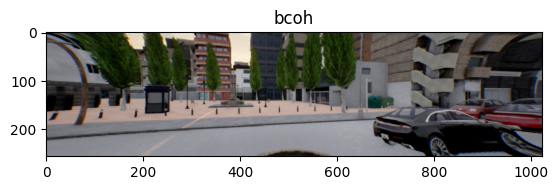

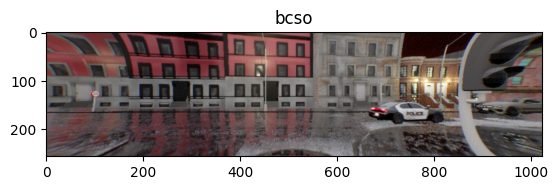

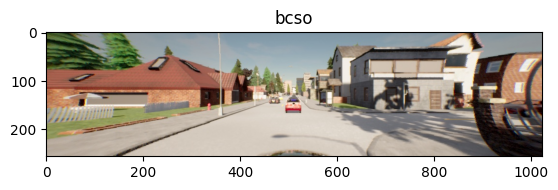

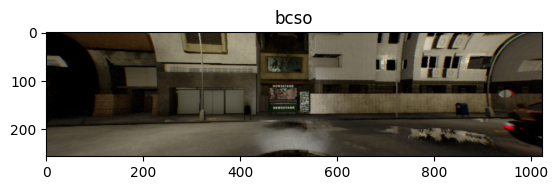

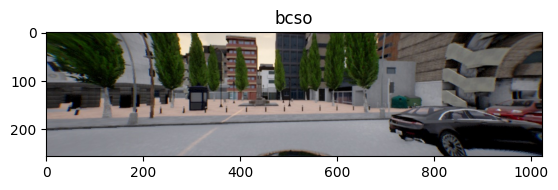

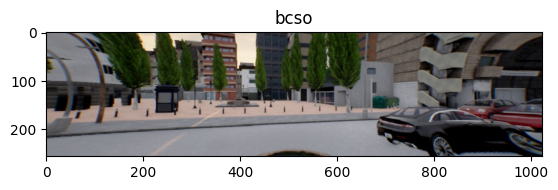

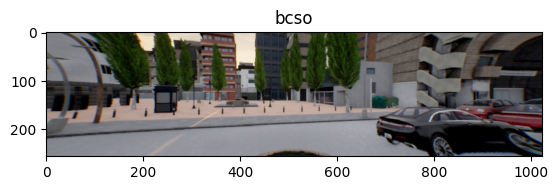

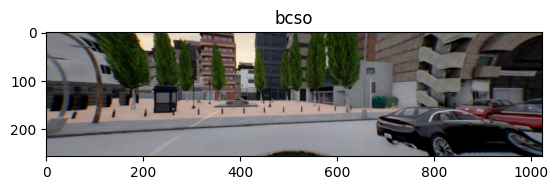

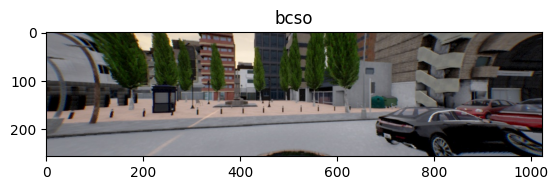

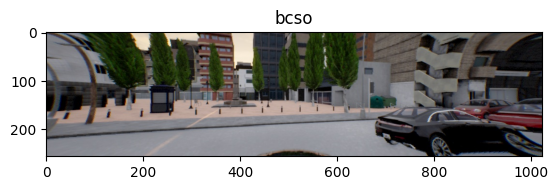

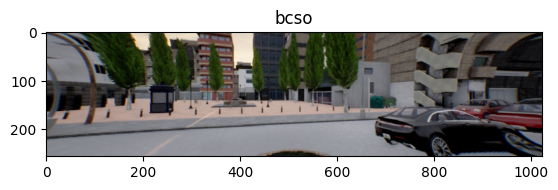

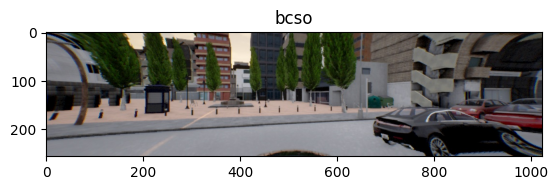

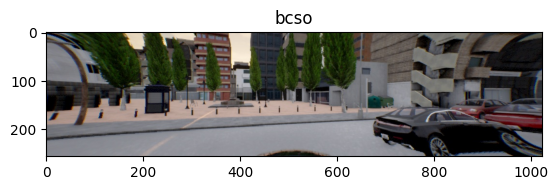

In [81]:
from PIL import Image
# all_data=pd.concat([data_arp, data_bcoh, data_bcso])
# upper_bound=np.std(all_data["loss"])*2
cc_arp=0
cc_bcoh=0
cc_bcso=0
for data,baseline in zip([data_arp, data_bcoh, data_bcso], ["arp", "bcoh", "bcso"]):
    pred=data["pred"]
    gt=data["gt"]
    loss=data["loss"]
    upper_bound=np.std(data["loss"])*2
    #mean is missing
    candidates=data[data["loss"]>upper_bound].reset_index(drop=True)
    # print(baseline)
    # print(len(candidates))
    for i in range(1,len(candidates)):
        if np.absolute(np.mean(candidates.iloc[i]["pred"]-candidates.iloc[i-1]["pred"]))<0.01:
            image=Image.open(candidates.iloc[i]["index"].replace("\x00", ""))
            fig,ax=plt.subplots()
            plt.title(baseline)
            plt.imshow(image)
            if baseline=="bcso":
                cc_bcso+=1
            if baseline=="bcoh":
                cc_bcoh+=1
            if baseline=="arp":
                cc_arp+=1
    print(f"copycat count for {baseline}")
    if baseline=="bcso":
        print(cc_bcso)
    if baseline=="bcoh":
        print(cc_bcoh)
    if baseline=="arp":
        print(cc_arp)

In [5]:
def norm(differences, ord):
    if ord==1:
        return np.sum(np.absolute(differences))
    if ord==2:
        return np.sqrt(np.sum(np.absolute(differences)**2))

count for real copycat for baseline arp: 0
gt distance 0.1742103099822998
pred distance 0.017337890341877937
gt wp [[[ 1.9698696e+00 -2.0257487e-04]
  [ 3.9888062e+00 -1.9582659e-03]
  [ 5.9363141e+00 -2.3384967e-03]
  [ 7.7785211e+00 -1.3298282e-03]
  [ 9.2274027e+00 -9.1650325e-04]
  [ 1.0249838e+01 -5.2099867e-04]
  [ 1.1193106e+01 -8.3589618e-04]
  [ 1.2212633e+01 -6.7872892e-04]]]
pred wp [[[ 2.1421802   0.12539506]
  [ 4.149856    0.07600348]
  [ 5.9426794   0.02817325]
  [ 7.5309253  -0.03970212]
  [ 8.97192    -0.13279258]
  [10.34087    -0.25217134]
  [11.694008   -0.39872718]
  [13.060139   -0.57484436]]]
/home/maximilian/datasets/one_curve/s10_dataset_2023_05_10/Routes_Town01_Scenario1_Repetition0/Town01_Scenario1_route0_05_10_21_14_24/rgb/0036.jpg


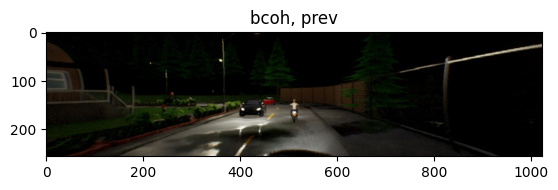

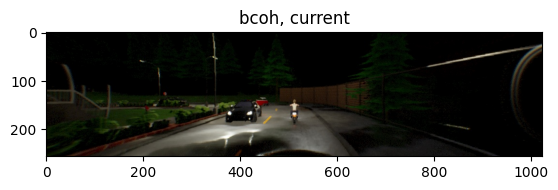

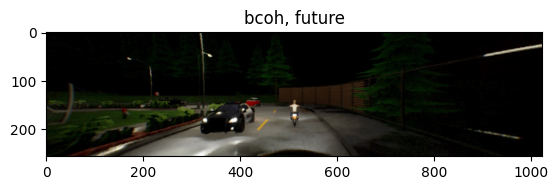

gt distance 0.25718361139297485
pred distance 0.00045280903577804565
gt wp [[[ 2.0045316e+00  1.1093467e-05]
  [ 4.0016780e+00  5.3381728e-04]
  [ 5.8342662e+00  1.2091471e-04]
  [ 7.2620163e+00 -7.2319939e-04]
  [ 8.2751684e+00 -1.2279011e-03]
  [ 9.1825705e+00 -1.6498312e-03]
  [ 1.0123678e+01 -1.5567963e-03]
  [ 1.1186689e+01 -1.2640626e-03]]]
pred wp [[[ 1.8469030e+00 -9.0352222e-03]
  [ 3.8233571e+00 -1.2597337e-02]
  [ 5.7391706e+00  1.1537693e-02]
  [ 7.6270151e+00  1.9118845e-02]
  [ 9.5361147e+00  1.2162246e-02]
  [ 1.1476213e+01  2.4321228e-03]
  [ 1.3435051e+01  1.8635914e-03]
  [ 1.5395503e+01  2.0143002e-02]]]
/home/maximilian/datasets/one_curve/s10_dataset_2023_05_10/Routes_Town01_Scenario1_Repetition0/Town01_Scenario1_route0_05_10_21_14_24/rgb/0111.jpg


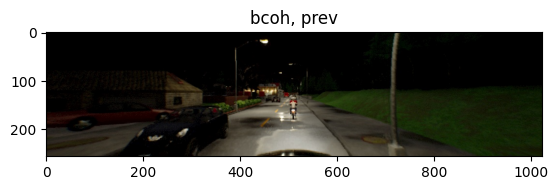

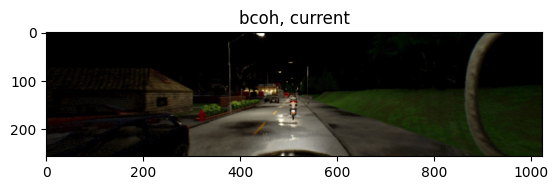

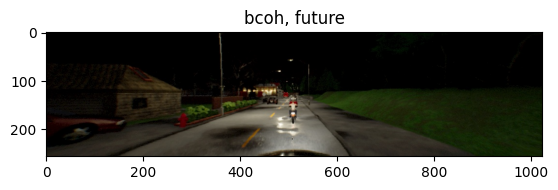

gt distance 0.269727885723114
pred distance 0.01145339384675026
gt wp [[[1.15686965e+00 3.20692106e-06]
  [2.45260215e+00 2.04911790e-04]
  [3.87916565e+00 1.64781336e-03]
  [5.42430067e+00 4.69463924e-03]
  [7.09031534e+00 6.84365956e-03]
  [8.87098980e+00 8.34323186e-03]
  [1.06825485e+01 9.19642579e-03]
  [1.24913559e+01 1.12644685e-02]]]
pred wp [[[ 1.0849938e+00  4.1106798e-02]
  [ 2.4665215e+00 -3.9345473e-03]
  [ 3.9191117e+00 -8.3273724e-03]
  [ 5.4137492e+00 -3.5442412e-03]
  [ 6.9592590e+00  4.1312054e-03]
  [ 8.5581312e+00  1.3053402e-02]
  [ 1.0206406e+01  2.3405395e-02]
  [ 1.1896540e+01  3.7129045e-02]]]
/home/maximilian/datasets/one_curve/s10_dataset_2023_05_10/Routes_Town01_Scenario1_Repetition0/Town01_Scenario1_route0_05_10_21_14_24/rgb/0142.jpg


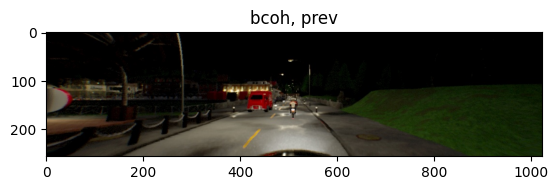

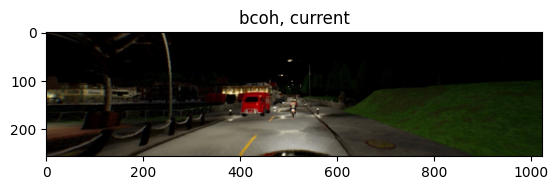

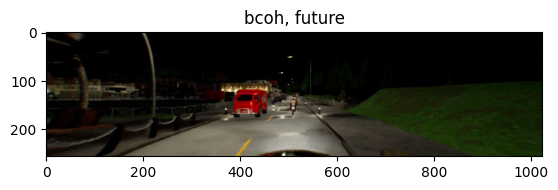

gt distance 0.13215617835521698
pred distance 0.029586218297481537
gt wp [[[ 1.9625701e+00  7.8918831e-04]
  [ 3.9625549e+00  1.4334504e-04]
  [ 5.9452062e+00 -1.2680129e-03]
  [ 7.9119115e+00 -2.0069983e-03]
  [ 9.8545084e+00 -2.5119667e-03]
  [ 1.1613404e+01 -2.5051960e-03]
  [ 1.2979936e+01 -3.3913513e-03]
  [ 1.3901277e+01 -3.5219591e-03]]]
pred wp [[[ 1.8774178  -0.03471052]
  [ 3.8540974  -0.03212379]
  [ 5.8003483  -0.03141046]
  [ 7.687478   -0.02831176]
  [ 9.538358   -0.02331652]
  [11.364433   -0.0182472 ]
  [13.167409   -0.01747901]
  [14.9503145  -0.0281131 ]]]
/home/maximilian/datasets/one_curve/s10_dataset_2023_05_10/Routes_Town01_Scenario1_Repetition0/Town01_Scenario1_route0_05_10_21_14_24/rgb/0213.jpg


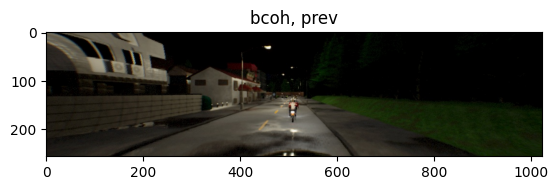

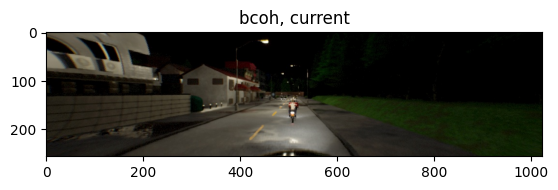

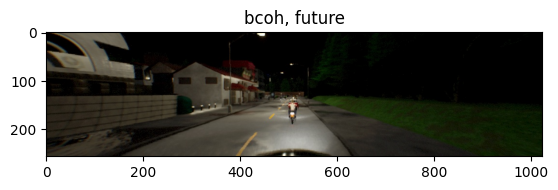

count for real copycat for baseline bcoh: 4
count for real copycat for baseline bcso: 0


In [34]:
last_and_previous=2
which_norm=2
vis=True
vis_hist=False
if vis_hist:
    fig,axs=plt.subplots(3,2, figsize=(15,10), sharex=True, sharey=True)
for data,baseline,ax in zip([data_arp, data_bcoh, data_bcso], ["arp", "bcoh", "bcso"],axs):
    data_copy=data.copy()
    data_copy['running_diff'] = data_copy['pred'].diff()
    data_copy['running_diff']=data_copy['running_diff'].apply(lambda x: norm(x,ord=which_norm))
    data_copy['running_diff_gt'] = data_copy['gt'].diff()
    data_copy['running_diff_gt']=data_copy['running_diff_gt'].apply(lambda x: norm(x,ord=which_norm))
    mean_value_gt=np.mean(data_copy["running_diff_gt"])
    mean_value_data=np.mean(data_copy["running_diff"])
    
    std_value_gt=np.std(data_copy["running_diff_gt"])
    
    std_value_data=np.std(data_copy["running_diff"])
    
    if vis_hist:
        ax[0].set_title(f"{baseline} residual")
        ax[0].hist(data_copy["running_diff"],bins=int(np.sqrt(len(data_copy["running_diff"]))), alpha=0.4, color="green", label="pred")
        ax[0].hist(data_copy["running_diff_gt"],bins=int(np.sqrt(len(data_copy["running_diff_gt"]))), alpha=0.4, color="blue", label="gt")
        ax[0].legend()
        ax[1].set_title(f"{baseline} loss")
        ax[1].hist(data_copy["loss"],bins=int(np.sqrt(len(data_copy["loss"]))), alpha=0.4, color="green", label="loss")
        ax[1].legend()
    
    #ax.set_xticks(range(len(data_copy["running_diff"])))
    # plt.vlines(x=mean_value_gt, ymin=0, ymax=100, label="mean gt", color="green")
    # plt.vlines(x=mean_value_data, ymin=0, ymax=100,label="mean data", color="blue")
    #only red lights 0.01 1
    #0.2 0.5
    #single curve 0.2 ung std_value gt 1 
    #oder 0.1
    count=0
    for i in range(1,len(data_copy["pred"])):
        
        if norm(data_copy["pred"][i]-data_copy["pred"][i-1], ord=which_norm)<std_value_data*0.1 and norm(data_copy["gt"][i]-data_copy["gt"][i-1], ord=which_norm)>std_value_gt:
            #print(norm(data_copy["gt"][i]-data_copy["gt"][i-1], ord=which_norm))
            count+=1
            if vis:
                print(f'gt distance {np.absolute(np.mean(data_copy["gt"][i]-data_copy["gt"][i-1]))}')
                print(f'pred distance {np.absolute(np.mean(data_copy["pred"][i]-data_copy["pred"][i-1]))}')
                print(f'gt wp {data_copy["gt"][i]}')
                print(f'pred wp {data_copy["pred"][i]}')
                for j in reversed(range(1,last_and_previous)):
                    image_path=data_copy.iloc[i-j]["index"]
                    print(image_path)
                    image_path=Image.open(image_path.replace("\x00", ""))
                    fig,ax=plt.subplots()
                    plt.title(f"{baseline}, prev")
                    plt.imshow(image_path)
                    plt.show()
                for k in range(last_and_previous):
                    image_path=data_copy.iloc[i+k]["index"]
                    image_path=Image.open(image_path.replace("\x00", ""))
                    fig,ax=plt.subplots()
                    if k==0:
                        plt.title(f"{baseline}, current")
                    else:
                        plt.title(f"{baseline}, future")
                    plt.imshow(image_path)
                    plt.show()
                plt.close()
    print(f"count for real copycat for baseline {baseline}: {count}")

__dataset argument__

In [13]:
from PIL import Image
# all_data=pd.concat([data_arp, data_bcoh, data_bcso])
# upper_bound=np.std(all_data["loss"])*2
last_and_previous=2
vis=False
for data,baseline in zip([data_arp, data_bcoh, data_bcso], ["arp", "bcoh", "bcso"]):
    count=0
    for i in range(1,len(data["pred"])):
        if np.absolute(np.mean(data["pred"][i]-data["pred"][i-1]))<std_value_data*0.01 and np.absolute(np.mean(data["gt"][i]-data["gt"][i-1]))>std_value_data*0.01:
            count+=1
            if vis:
                print(f'gt distance {np.absolute(np.mean(data["gt"][i]-data["gt"][i-1]))}')
                print(f'pred distance {np.absolute(np.mean(data["pred"][i]-data["pred"][i-1]))}')
                print(f'gt wp {data["gt"][i]}')
                print(f'pred wp {data["pred"][i]}')
                for j in reversed(range(1,last_and_previous)):
                    image_path=data.iloc[i-j]["index"]
                    image_path=Image.open(image_path.replace("\x00", ""))
                    fig,ax=plt.subplots()
                    plt.title(f"{baseline}, prev")
                    plt.imshow(image_path)
                    plt.show()
                for k in range(last_and_previous):
                    image_path=data.iloc[i+k]["index"]
                    image_path=Image.open(image_path.replace("\x00", ""))
                    fig,ax=plt.subplots()
                    if k==0:
                        plt.title(f"{baseline}, current")
                    else:
                        plt.title(f"{baseline}, future")
                    plt.imshow(image_path)
                    plt.show()
                plt.close()
    print(f"count for real copycat for baseline {baseline}: {count}")

count for real copycat for baseline arp: 16
count for real copycat for baseline bcoh: 4
count for real copycat for baseline bcso: 2
